In [1]:
# PatchMatch
# Julien.Rabin@unicaen.fr 2020
# Exercice : test this code !

In [2]:
from patchmatch import MappingUtils
from patchmatch import PatchMatchLib
from patchmatch import PatchMatchGPU

import torch
import torchvision

from PIL import Image
import matplotlib.pyplot as plt

import time

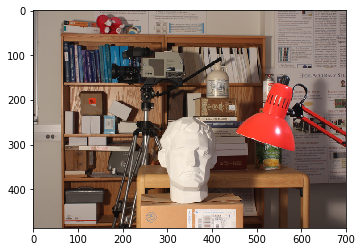

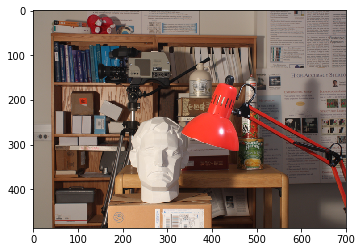

In [3]:
image = Image.open('images/im0.png')
reference = Image.open('images/im1.png')

if False : # resize images
    imsize = 256
    image = torch.nn.functional.adaptive_avg_pool2d(torchvision.transforms.ToTensor()(image), imsize)
    reference = torch.nn.functional.adaptive_avg_pool2d(torchvision.transforms.ToTensor()(reference), imsize)
    image = torchvision.transforms.ToPILImage()(image)
    reference = torchvision.transforms.ToPILImage()(reference)


plt.figure()
plt.imshow(image)
plt.show()
plt.imshow(reference)
plt.show()

In [6]:
# CPU version
t0 = time.time()
offsets, mapping = PatchMatchLib.patch_match(image, reference, patch_size=8, iterations=5, alpha=0.5)
t0 = time.time()-t0      
print('Elapsed time with CPU : ', t0, ' seconds')


# GPU version
t0 = time.time()
offsets2, mapping2 = PatchMatchGPU.patch_match(image, reference, patch_size=8, iterations=5, dtresh=0.01, initialization=None, itresh=None, device=None)
t0 = time.time()-t0      
print('Elapsed time with GPU : ', t0, ' seconds')


Elapsed time with CPU :  641.1861090660095  seconds
Elapsed time with GPU :  0.3912336826324463  seconds


In [7]:
# reconstruct
image2 = MappingUtils.reconstruct(reference, mapping2)

# colormap of offset
offsets_color = MappingUtils.colormap(offsets2)

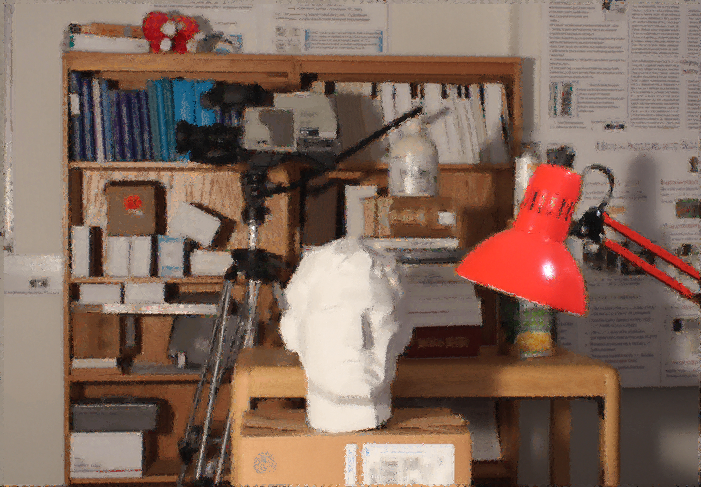

In [8]:
image2

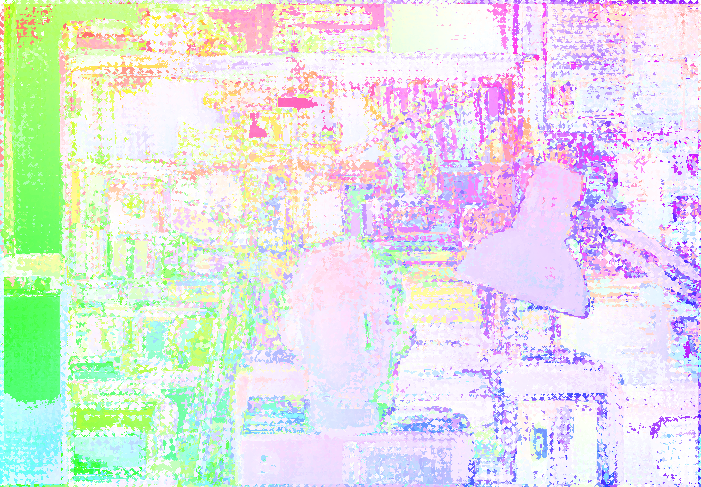

In [9]:
offsets_color